# Introduction to the xgbsurv package

This notebook introduces `xgbsurv` using a specific dataset. It structured by the following steps:

- Load data
- Load model
- Fit model
- Predict and evaluate model

The syntax conveniently follows that of sklearn.

In [1]:
from xgbsurv.datasets import load_metabric
from xgbsurv import XGBSurv
from xgbsurv.models.utils import sort_X_y, transform_back
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


## Load Data

In [2]:
data = load_metabric(path="/Users/JUSC/Documents/xgbsurv/xgbsurv/datasets/data/", as_frame=False)
# stratify by event indicated by sign
target_sign = np.sign(data.target)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=target_sign)
# sort data
X_train, y_train = sort_X_y(X_train, y_train)
X_test, y_test = sort_X_y(X_test, y_test)

## Load Model

In [3]:
model = XGBSurv(n_estimators=25, objective="breslow_objective",
                                             eval_metric="breslow_loss",
                                             learning_rate=0.3,
                                             random_state=7, 
                                             disable_default_eval_metric=True)
model

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=True, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function breslow_likelihood at 0x7f8c88d7dc60>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=25, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function breslow_objective at 0x7f8c88d7e170>), ...)

The options of loss and objective functions can be obtained like below:

In [4]:
print(model.get_loss_functions().keys())
print(model.get_objective_functions().keys())

dict_keys(['breslow_loss', 'efron_loss', 'cind_loss', 'deephit_loss', 'aft_loss', 'ah_loss', 'eh_loss'])
dict_keys(['breslow_objective', 'efron_objective', 'cind_objective', 'deephit_objective', 'aft_objective', 'ah_objective', 'eh_objective'])


## Fit Model

In [5]:
eval_set = [(X_train, y_train)]

In [6]:
model.fit(X_train, y_train, eval_set=eval_set)

[0]	validation_0-breslow_likelihood:6.36294
[1]	validation_0-breslow_likelihood:6.28036
[2]	validation_0-breslow_likelihood:6.21558
[3]	validation_0-breslow_likelihood:6.16283
[4]	validation_0-breslow_likelihood:6.10448
[5]	validation_0-breslow_likelihood:6.07020
[6]	validation_0-breslow_likelihood:6.03247
[7]	validation_0-breslow_likelihood:6.01204
[8]	validation_0-breslow_likelihood:5.97214
[9]	validation_0-breslow_likelihood:5.92267
[10]	validation_0-breslow_likelihood:5.88734
[11]	validation_0-breslow_likelihood:5.86407
[12]	validation_0-breslow_likelihood:5.83707
[13]	validation_0-breslow_likelihood:5.80939
[14]	validation_0-breslow_likelihood:5.77368
[15]	validation_0-breslow_likelihood:5.75702
[16]	validation_0-breslow_likelihood:5.74128
[17]	validation_0-breslow_likelihood:5.72589
[18]	validation_0-breslow_likelihood:5.70354
[19]	validation_0-breslow_likelihood:5.69525
[20]	validation_0-breslow_likelihood:5.68520
[21]	validation_0-breslow_likelihood:5.66540
[22]	validation_0-br

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=True, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function breslow_likelihood at 0x7f8c88d7dc60>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=25, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function breslow_objective at 0x7f8c88d7e170>), ...)

The model can be saved like below. Note that objective and eval_metric are not saved.

In [7]:
model.save_model("introduction_model_breslow.json")

## Predict

In [8]:
preds_train = model.predict(X_train, output_margin=True)
preds_test = model.predict(X_test, output_margin=True)

### Predict Cumulative Hazard

In [9]:
df_cum_hazards = model.predict_cumulative_hazard_function(X_train, X_test, y_train, y_test)
df_cum_hazards.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
300.866669,9.920585,2.341191,11.339745,1.786138,10.484677,11.150063,18.201271,1.942509,6.420807,3.433644,...,0.753338,11.491071,3.391701,119.821002,1.071769,1.94456,1.614804,58.131563,1.092895,2.189367
307.633331,9.920585,2.341191,11.339745,1.786138,10.484677,11.150063,18.201271,1.942509,6.420807,3.433644,...,0.753338,11.491071,3.391701,119.821002,1.071769,1.94456,1.614804,58.131563,1.092895,2.189367
330.366669,9.920585,2.341191,11.339745,1.786138,10.484677,11.150063,18.201271,1.942509,6.420807,3.433644,...,0.753338,11.491071,3.391701,119.821002,1.071769,1.94456,1.614804,58.131563,1.092895,2.189367


## Predict Survival Function

In [10]:
df_survival_function = model.predict_survival_function(X_train, X_test, y_train, y_test)
df_survival_function.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
300.866669,0.000049,0.096213,0.000012,0.167606,0.000028,0.000014,1.245341e-08,0.143344,0.001627,0.032269,...,0.470792,0.00001,0.033651,9.170645e-53,0.342402,0.14305,0.19893,5.672610e-26,0.335245,0.111988
307.633331,0.000049,0.096213,0.000012,0.167606,0.000028,0.000014,1.245341e-08,0.143344,0.001627,0.032269,...,0.470792,0.00001,0.033651,9.170645e-53,0.342402,0.14305,0.19893,5.672610e-26,0.335245,0.111988
330.366669,0.000049,0.096213,0.000012,0.167606,0.000028,0.000014,1.245341e-08,0.143344,0.001627,0.032269,...,0.470792,0.00001,0.033651,9.170645e-53,0.342402,0.14305,0.19893,5.672610e-26,0.335245,0.111988


### Visualize Predictions

Text(0.5, 1.0, 'Survival Curve Test Set')

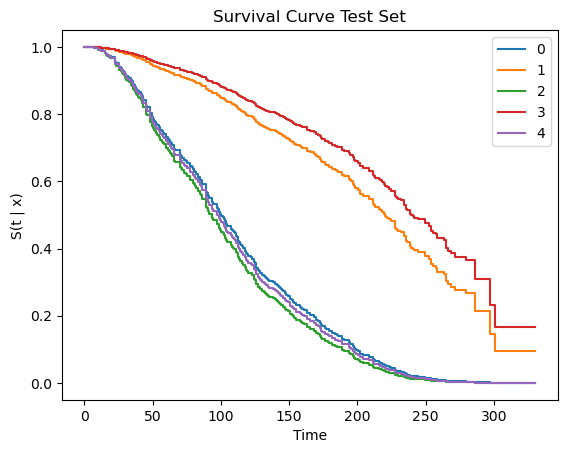

In [11]:
df_survival_function.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Survival Curve Test Set")

## Evaluate

### Train

### Test

In [12]:
durations_train, events_train = transform_back(y_train)
time_grid = np.linspace(durations_train.min(), durations_train.max(), 100)
ev = EvalSurv(df_survival_function, durations_train, events_train, censor_surv='km')
print('Concordance Index',ev.concordance_td('antolini'))
print('Integrated Brier Score:',ev.integrated_brier_score(time_grid))

AssertionError: 

In [ ]:
print(type(durations_train), type(events_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
durations_test, events_test = transform_back(y_test)
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev = EvalSurv(df_survival_function, durations_test, events_test, censor_surv='km')
print('Concordance Index',ev.concordance_td('antolini'))

Concordance Index 0.6415154288038228


In [ ]:
print('Integrated Brier Score:',ev.integrated_brier_score(time_grid))

Integrated Brier Score: 0.18514765174751255


In [ ]:
df_survival_function

,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
3.366667,0.999624,0.998993,0.999075,9.979494e-01,0.999212,9.939362e-01,0.999274,0.999138,0.999021,0.999174,...,0.999528,0.999645,0.999373,0.999853,0.999209,0.998614,0.999454,0.999382,9.962745e-01,0.999653
3.500000,0.999624,0.998993,0.999075,9.979494e-01,0.999212,9.939362e-01,0.999274,0.999138,0.999021,0.999174,...,0.999528,0.999645,0.999373,0.999853,0.999209,0.998614,0.999454,0.999382,9.962745e-01,0.999653
3.766667,0.999624,0.998993,0.999075,9.979494e-01,0.999212,9.939362e-01,0.999274,0.999138,0.999021,0.999174,...,0.999528,0.999645,0.999373,0.999853,0.999209,0.998614,0.999454,0.999382,9.962745e-01,0.999653
4.433333,0.999499,0.998657,0.998766,9.972650e-01,0.998948,9.919178e-01,0.999031,0.998851,0.998695,0.998898,...,0.999370,0.999527,0.999164,0.999804,0.998945,0.998151,0.999271,0.999175,9.950324e-01,0.999538
5.833333,0.999240,0.997966,0.998131,9.958587e-01,0.998407,9.877790e-01,0.998533,0.998259,0.998023,0.998331,...,0.999046,0.999283,0.998733,0.999702,0.998402,0.997200,0.998896,0.998750,9.924825e-01,0.999299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300.866669,0.091013,0.001629,0.002743,2.072712e-06,0.006548,1.444089e-17,0.009745,0.004104,0.001947,0.005162,...,0.049288,0.104221,0.018369,0.391076,0.006444,0.000145,0.030678,0.019394,4.629228e-11,0.109671
307.633331,0.091013,0.001629,0.002743,2.072712e-06,0.006548,1.444089e-17,0.009745,0.004104,0.001947,0.005162,...,0.049288,0.104221,0.018369,0.391076,0.006444,0.000145,0.030678,0.019394,4.629228e-11,0.109671
318.200012,0.091013,0.001629,0.002743,2.072712e-06,0.006548,1.444089e-17,0.009745,0.004104,0.001947,0.005162,...,0.049288,0.104221,0.018369,0.391076,0.006444,0.000145,0.030678,0.019394,4.629228e-11,0.109671
322.833344,0.091013,0.001629,0.002743,2.072712e-06,0.006548,1.444089e-17,0.009745,0.004104,0.001947,0.005162,...,0.049288,0.104221,0.018369,0.391076,0.006444,0.000145,0.030678,0.019394,4.629228e-11,0.109671


In [ ]:
## Randomized Search